In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualisation and plotting
import matplotlib.pyplot as plt # data plotting
import warnings
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris



In [157]:
df=pd.read_csv('C:/Users/prajw/Desktop/ML-1/iris.data')

In [158]:
df.head(5)

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   5.1          149 non-null    float64
 1   3.5          149 non-null    float64
 2   1.4          149 non-null    float64
 3   0.2          149 non-null    float64
 4   Iris-setosa  149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [160]:
df.describe()

,5.1,3.5,1.4,0.2
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [161]:
df['Iris-setosa'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: Iris-setosa, dtype: int64

In [162]:
rows, col = df.shape
print("Rows : %s, column : %s" % (rows, col))

Rows : 149, column : 5


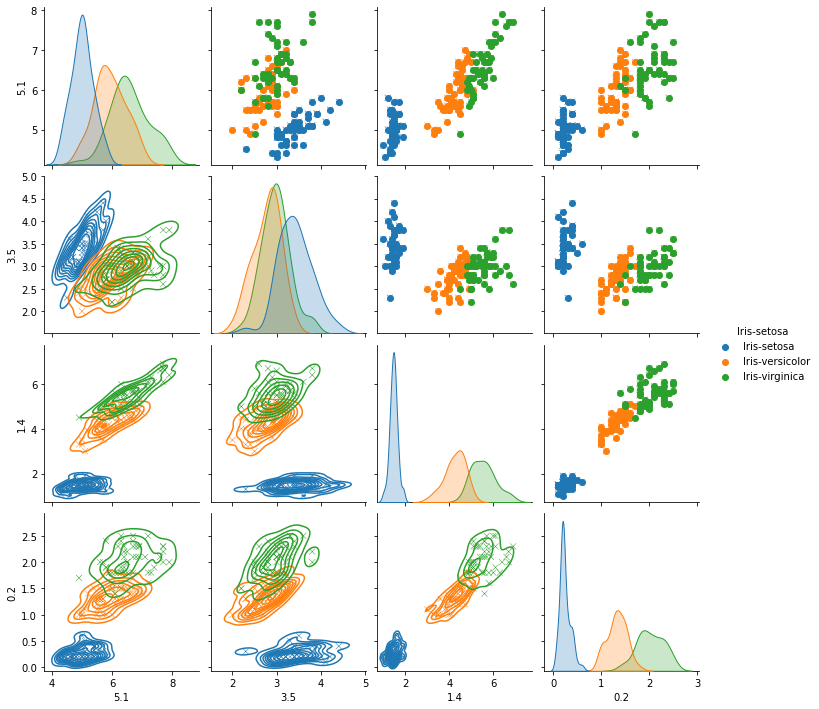

In [163]:

g = sns.pairplot(df, hue='Iris-setosa', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

In [164]:
y= df['Iris-setosa']
X = df.drop('Iris-setosa', axis=1)

In [165]:
X.head(5)

,5.1,3.5,1.4,0.2
0,4.9,3.0,1.4,0.2
1,4.7,3.2,1.3,0.2
2,4.6,3.1,1.5,0.2
3,5.0,3.6,1.4,0.2
4,5.4,3.9,1.7,0.4


In [166]:
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

X = df.drop(['Iris-setosa'], axis=1).values # Input Feature Values
y = df['Iris-setosa'].replace(mapping).values.reshape(rows,1) # Output values

X = np.hstack(((np.ones((rows,1))), X))# Adding one more column for bias

In [167]:
y.shape

(149, 1)

In [168]:
def computeCost(X, y, theta):
    inner_product = (np.dot(X, theta.T) - y) ** 2
    return np.sum(inner_product) / (2 * len(X))

In [169]:
np.random.seed(0) # Let's set the zero for time being
theta = np.random.randn(5,1) # Setting values of theta randomly

print("Theta : %s" % (theta))

Theta : [[1.76405235]
 [0.40015721]
 [0.97873798]
 [2.2408932 ]
 [1.86755799]]


In [170]:
theta.shape

(5, 1)

In [171]:
theta.ravel()

array([1.76405235, 0.40015721, 0.97873798, 2.2408932 , 1.86755799])

In [172]:
X.shape

(149, 5)

In [177]:
def compute_cost(X, y, theta):

  predictions = X.dot(theta)
  #print('predictions= ', predictions[:5])
  errors = np.subtract(predictions, y)
  #print('errors= ', errors[:5]) 
  sqrErrors = np.square(errors)
  #print('sqrErrors= ', sqrErrors[:5]) 
  #J = 1 / (2 * m) * np.sum(sqrErrors)
  # OR
  # We can merge 'square' and 'sum' into one by taking the transpose of matrix 'errors' and taking dot product with itself
  # If your confuse about this try to do this with few values for better understanding  
  J = 1/(2 * rows) * errors.T.dot(errors)

  return J

In [178]:
def gradient_descent(X, y, theta, alpha, iterations):
 
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    #print('predictions= ', predictions[:5])
    errors = np.subtract(predictions, y)
    #print('errors= ', errors[:5])
    sum_delta = (alpha / rows) * X.transpose().dot(errors);
    #print('sum_delta= ', sum_delta[:5])
    theta = theta - sum_delta;

    cost_history[i] = compute_cost(X, y, theta)  

    return theta, cost_history

In [179]:
#theta = np.zeros()
iterations = 1000;
alpha = 0.001

In [180]:
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('First 5 values from cost_history =', cost_history[: 5])
print('Last 5 values from cost_history =', cost_history[: -5])

Final value of theta = [[1.73347054]
 [0.21447671]
 [0.88662585]
 [2.10955625]
 [1.82394774]]
First 5 values from cost_history = [105.08991218   0.           0.           0.           0.        ]
Last 5 values from cost_history = [105.08991218   0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           0.           0.           0.           0.
   0.           

In [181]:
 prediction = np.round(np.dot(x_train, theta))

In [183]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=0)

for i in range(2,10):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=1/4,random_state=42)
    theta, cost_history = gradient_descent(x_train, y_train, theta, alpha, iterations)
    prediction = np.round(np.dot(x_test, theta))
    lin_mae = mean_absolute_error(y_test, prediction)
    print(lin_mae)
    print("cross validation score for %d comparisions: %0.2f (+/- %0.2f)" % (i,lin_mae.mean(), lin_mae.std() * 2))

8.763157894736842
cross validation score for 2 comparisions: 8.76 (+/- 0.00)
8.078947368421053
cross validation score for 3 comparisions: 8.08 (+/- 0.00)
7.815789473684211
cross validation score for 4 comparisions: 7.82 (+/- 0.00)
7.368421052631579
cross validation score for 5 comparisions: 7.37 (+/- 0.00)
7.052631578947368
cross validation score for 6 comparisions: 7.05 (+/- 0.00)
6.631578947368421
cross validation score for 7 comparisions: 6.63 (+/- 0.00)
6.394736842105263
cross validation score for 8 comparisions: 6.39 (+/- 0.00)
6.0
cross validation score for 9 comparisions: 6.00 (+/- 0.00)
